In [26]:
import numpy as np
import matplotlib.pyplot as plt

#import sys
#sys.path.append('/home/buhmae/3_erum_data_data/erum_data_data/erum_data_data')
#import importlib
#import erum_data_data as edd
#importlib.reload(edd)

# or just:
import erum_data_data as edd

print('imports dones')

imports dones


In [27]:
# dataset description
edd.print_description('airshower')


    
Airshower Proton vs Iron Classification

Based on https://doi.org/10.1016/j.astropartphys.2017.10.006

Produced by jonas.glombitza@rwth-aachen.de
    
----------------------------------    
Dataset shape:

Three sets of input data:
- first set of input data (shape: [70k, 9, 9, 80]):
    - 70k events (airshowers)
    - 9x9 = 81 ground detector stations
    - 80 measured signal bins (forming one signal trace per station)
    -padding: (-1) padding for instances that the detector / or timestep did not detect a particle
    
- second set of input data (shape: [70k, 9, 9, 1]:
    - 70k events (airshowers)
    - 9x9 = 81 ground detector stations   
    - 1 starting time of the signal trace (arrival time of first particles at each station)

- third set of input data
    - detector geometry - for reference if needed
    - 81 ground detector stations
    - 3 features: x,y,z location of each station
  
---------------------------------- 
Label: 
Proton (1) vs. Iron (0) as shower origin par

In [22]:
# load training and testing set
X_train, y_train = edd.load('airshower', 'train', cache_dir = '/home/buhmae/3_erum_data_data/erum_data_data', cache_subdir = 'datasets')
X_test, y_test = edd.load('airshower', 'test', cache_dir = '/home/buhmae/3_erum_data_data/erum_data_data', cache_subdir = 'datasets')

In [23]:
# checking basic content

print(len(X_train))
print(len(X_test))

print(X_train[0].shape)
print(X_train[1].shape)
print(X_train[2].shape)

print(y_train.shape)
print(y_test.shape)

3
3
(70000, 9, 9, 80)
(70000, 9, 9, 1)
(81, 3)
(70000,)
(30000,)


# some basic plots

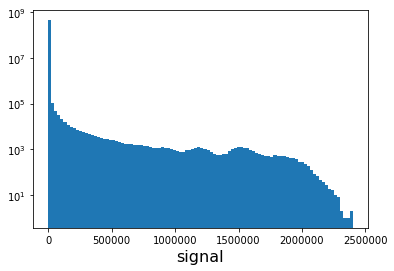

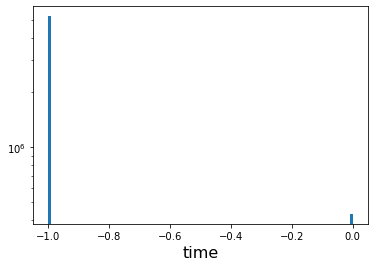

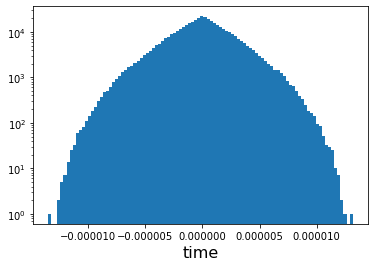

In [24]:
X = X_train[0]

# total signal histogram
plt.clf()
plt.hist(X.ravel(), bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('signal', fontsize=16)
plt.show()

X = X_train[1]

# total time histogram
plt.clf()
plt.hist(X.ravel(), bins = 100)#, range=[-1,0.5])
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('time', fontsize=16)
plt.show()

# zoom on time without (-1) padding
X = X[X > -1].ravel()

plt.clf()
plt.hist(X, bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('time', fontsize=16)
plt.show()

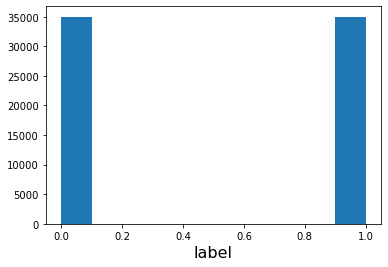

In [25]:
# labels
    
plt.clf()
plt.hist(y_train, bins=10)
plt.xlabel('label', fontsize=16)
plt.show()